# Sistema de Recomendação por Similaridade de Imagens
## Segunda Parte: Consulta de Imagem
<p>Esta segunda parte do projeto compara uma imagem com as da base de treino, retornando as 4 imagens mais similares. 

### Etapa 1: Importação de bibliotecas

In [4]:
import matplotlib.pyplot as plt #para exibição das imagens
from  matplotlib import gridspec #para exibição das imagens
import numpy as np #para cálculos vetoriais / tensoriais
import os #para tratar caminhos de arquivos
import pandas as pd #para lidar com DataFrames
import random #opcional; para escolher uma entre n imagens de consulta
import utils #contém a função de extração de features
from keras.utils import load_img #para exibição das imagens
from sklearn.neighbors import NearestNeighbors as NN #para calcular os pontos mais próximos no espaço vetorial

img_folder = utils.img_folder #pasta com as imagens da base de treino

print('Tudo certo com as importações')

Tudo certo com as importações


### Etapa 2: Definição do espaço vetorial

In [5]:
df = pd.read_csv('image_features.csv') #importa o DataFrame armazenado no arquivo externo
X = df.drop('file_name', axis=1).to_numpy() # separa as features das imagens
Y = df['file_name'] #separa os nomes das imagens
n_neighbors = 4 #vamos retornar os 4 pontos mais próximos ao ponto de consulta
# A seguir, convertemos o Dataframe de features em um espaço vetorial, para podermos medir
# as distâncias euclidianas entre os pontos de dados (imagens vetorizadas)
nbrs = NN(n_neighbors=n_neighbors, algorithm='ball_tree', metric='euclidean').fit(X)


### Etapa 3: Consulta de imagem

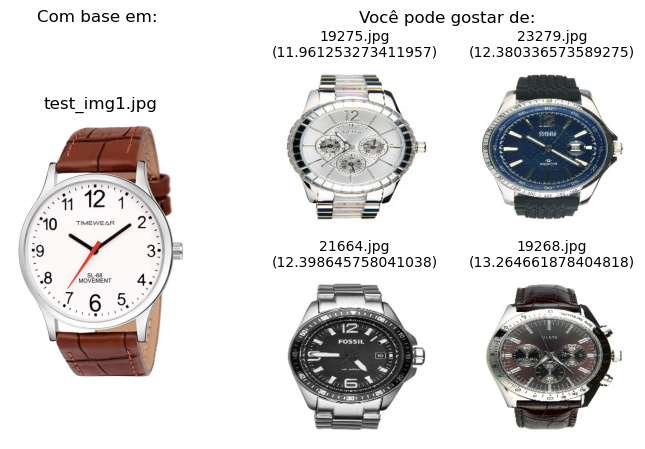

In [12]:
fname = random.choice(os.listdir('test_images')) #Escolhemos uma imagem das disponíveis para consulta

img_query = os.path.join('test_images', fname) #caminho da imagem de consulta
query = utils.img_features_extract(img_query, verbose=0) #extrai as features da imagem
query = np.expand_dims(query, axis=0) #adequa a dimensão do tensor da imagem
# Calculamos os 4 pontos de dados mais próximos ao ponto usado para consulta.
# ISto se traduz como as 4 imagens mais similares à imagem de consulta
distances, indices = nbrs.kneighbors(query)


def format_axes(fig):
    """Formata os eixos de uma figura

    Args:
        fig (plt.figure): figura a ser formatada
    """
    for i, ax in enumerate(fig.axes): #para todos os eixos da figura:
        ax.axis('off') #oculta os eixos do gráfico

# O código abaixo cria uma figura com duas partes:
# Na parte da esquerda, exibiremos a imagem de consulta.
# Na parte da direita, exibiremos as 4 imagens mais similares à de consulta
fig = plt.figure(figsize=(7,5)) # cria a figura principal
GridSpec = gridspec.GridSpec(ncols=3, nrows=1, figure= fig) #define a forma para criação de subfiguras
sub_fig_1 = fig.add_subfigure(GridSpec[:,0]) #cria uma subfigura à esquerda da figura principal
sub_fig_1.suptitle('Com base em:')
subplots_1 = sub_fig_1.subplots(1,1) #cria um subplot (1,1) na subfigura da esquerda
plt.imshow(load_img(img_query)) # imagem de consulta
plt.title(fname)

sub_fig_2 = fig.add_subfigure(GridSpec[:,1:]) #cria uma subfigura à direita da figura principal
sub_fig_2.suptitle('Você pode gostar de:')
subplots_2 = sub_fig_2.subplots(2,2) #cria uma grade (2,2) de subplots

# Primeira sugestão de imagem
subplots_2[0,0].imshow(load_img(os.path.join(img_folder, Y[indices[0][0]])))
subplots_2[0,0].set_title(f'{Y[indices[0][0]]}\n({distances[0][0]})', fontsize=10)

# Segunda sugestão de imagem
subplots_2[0,1].imshow(load_img(os.path.join(img_folder, Y[indices[0][1]])))
subplots_2[0,1].set_title(f'{Y[indices[0][1]]}\n({distances[0][1]})', fontsize=10)

# Terceira sugestão de imagem
subplots_2[1,0].imshow(load_img(os.path.join(img_folder, Y[indices[0][2]])))
subplots_2[1,0].set_title(f'{Y[indices[0][2]]}\n({distances[0][2]})', fontsize=10)
# Quarta sugestão de imagem
subplots_2[1,1].imshow(load_img(os.path.join(img_folder, Y[indices[0][3]])))
subplots_2[1,1].set_title(f'{Y[indices[0][3]]}\n({distances[0][3]})', fontsize=10)

format_axes(fig) #retira os eixos dos gráficos
plt.show() #exibe a figura criada